## Proyecto Integrado 1

## 1. Contenido <a name="content"></a>

* [1 Contenido](#content)
* [2 Introducción](#intro)
* [3 Inicialización](#inic)
    * [3.1 Cargar Librerias](#library)
    * [3.2 Cargar Datos](#data)
* [4 Exploración y preparación los datos](#exp)       
* [5 Tratar los valores ausentes](#absent)
    * [5.1 Columna "name" y "genre"](#name)
    * [5.2 Columna "year_of_release"](#year)
    * [5.3 Columna "critic_score"](#critic)
    * [5.4 Columna "user_score"](#user)
    * [5.5 Columna "rating"](#rating)
* [6 Enriquecimiento de los datos](#enriching)
* [7 Analisis de los datos](#analysis) 
    * [7.1 Juegos lanzados en diferentes años](#dif)
    * [7.2 Variación de ventas entre plataformas](#platform)
    * [7.3 Periodo a abarcar](#period)
    * [7.4 Recorte base de datos](#cutout)
    * [7.5 Plataformas más rentables](#rentable)
    * [7.6 Ventas globales](#global)
    * [7.7 Correlación entre reseñas y ventas](#corr)
    * [7.8 Mismos juegos en diferentes plataformas](#same)
    * [7.9 Distribución de ventas por géneros](#genre)
* [8 Perfil de usuario](#profile) 
    * [8.1 Perfil usuario norteamericano](#profile_na)
    * [8.2 Perfil usuario europeo](#profile_eu)
    * [8.3 Perfil usuario japones](#profile_jp)
    * [8.4 Conclusiones perfiles de usuarios](#conclusion1)
* [9 Prueba de hipótesis](#hypothesis)    
    * [9.1 Calificaciones promedio usuarios Xbox One y PC](#xone_pc)
    * [9.2 Calificaciones promedio usuarios Acción y Deportes](#action_sports)
* [10 Conclusión general](#end)

## 2. Introducción <a name="intro"></a>

En el presente proyecto se procederá a realizar un análisis para la tienda online Ice que vende videojuegos por todo el mundo con el objetivo de identificar patrones que determinen si un juego tiene éxito o no, para detectar proyectos prometedores y planificar campañas publicitarias. 

Comenzaremos realizando un pre procesamiento de la base de datos otorgada por ice que posee datos de venta de distintos videojuegos hasta 2016, continuaremos realizando un enriquecimiento de los mismos para posteriormente realizar un análisis sobre las ventas por periodos, plataformas, regiones, géneros, entre otros.

 Finalmente llevaremos a cabo pruebas de hipótesis sobre las clasificaciones de usuarios para dos plataformas y para dos géneros, para terminar con una conclusion general sobre el proyecto.

## 3. Inicialización <a name="inic"></a>

### 3.1 Cargar librerias <a name="library"></a>

Se procede a cargar las librerías que se utilizaran en el proyecto.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

### 3.2 Cargar datos <a name="data"></a>

Se procede a cargar los datos.

In [2]:
games = pd.read_csv("datasets/games.csv")

## 4. Exploración y preparación los datos <a name="exp"></a>

A continuación, observaremos la base de datos de ice para buscar posibles problemas existentes que deban ser tratados para poder realizar un posterior correcto análisis sobre la misma, buscaremos valores duplicados, ausentes o valores que no tengan un sentido lógico dentro del contexto en que se encuentran. Dentro de la misma sección procederemos a corregir los problemas que se encuentren.

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
duplicated_games = games[games.duplicated()]
percentaje_duplicated = len(duplicated_games)/len(games)
percentaje_format = "{:.2%}".format(percentaje_duplicated)
print(percentaje_format)

0.00%


Tras realizar una exploración preliminar de los datos podemos notar algunos puntos que tratar, existen columnas con tipos de datos erróneos o que pueden cambiarse por unos más convenientes como year_of_release que lo cambiaremos de float a int, se estandarizara el nombre de las columnas y de los datos pasándolos todos a minúsculas para facilitar el trabajo con los mismos, también podemos apreciar que no existen filas duplicadas en el dataframe. Por último, podemos observar la presencia de valores ausentes en distintas columnas, pero esto se abordará en la siguiente sección.

In [6]:
games.columns = games.columns.str.lower()

In [7]:
games = games.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)

In [8]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [9]:
games["year_of_release"] = games["year_of_release"].astype("Int32")

In [10]:
games["critic_score"] = games["critic_score"].astype("Int32")

In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int32  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int32(2), float64(5), object(4)
memory usage: 1.3+ MB


In [12]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


## 5. Tratar los valores ausentes <a name="absent"></a>

En la sección anterior observamos que algunas columnas poseen valores ausentes, en específico las columnas "name", "year_of_release", "genre", "critic_score", "user_score" y "rating". Comenzaremos definiendo una función para que nos faciliten el tratar los valores ausentes y procederemos a abordar cada columna.

In [13]:
def llenar1(carac, mode):
    games.loc[games["name"]==carac, "year_of_release"] = games.loc[games["name"]==carac]["year_of_release"].fillna(mode)

### 5.1 Columna "name" y "genre" <a name="name"></a>

In [14]:
games[games["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Al ver las filas que contienen valores ausentes en la columna "name" podemos notar que son las mismas dos filas que contiene los valores ausentes de la columna "genre" por lo que se abordaran ambos casos juntos. En este caso podemos notar que ambas filas poseen varias columnas con valores ausentes, esto se podría deber al año que registra el juego, 1993, por lo que estos datos se encuentran perdidos, pero no es muy consecuente el hecho de tener el número de ventas de un videojuego pero no saber su nombre, es decir no tener un identificador de a que pertenecen estas ventas, por lo que debido a estas inconsecuencias y a que las filas corresponden a alrededor de un 0,001% de los datos es que se procederá a eliminarlas. 

In [15]:
games = games.dropna(subset=['name']) 

### 5.2 Columna "year_of_release" <a name="year"></a>

Procederemos a analizar la columna "year_of_release"

In [16]:
games["year_of_release"].isna().sum()

269

Observamos que existen 269 valores nulos en la columna "year_of_release", comenzaremos rellenando los valores nulos de los videojuegos que se encuentran presentes en varias plataformas y alguna de estas posee valores de año de lanzamiento, para esto calcularemos la moda, en caso de que más de una plataforma posea año de lanzamiento y estos sean distintos, y procederemos a rellenar los valores ausentes.

In [17]:
duplicated_not_null = games.drop(games[games.year_of_release.isnull()].index)

In [18]:
duplicated_not_null_mode = duplicated_not_null.pivot_table(index=["name"], values="year_of_release", aggfunc = lambda x: x.mode().iloc[0])

In [19]:
df_duplicated_mode = duplicated_not_null_mode.reset_index()
df_duplicated_mode.apply(lambda x: llenar1(x["name"], x["year_of_release"]), axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
11421    None
11422    None
11423    None
11424    None
11425    None
Length: 11426, dtype: object

In [20]:
games["year_of_release"].isna().sum()

146

Después de rellenar los datos aún quedan 146 valores ausentes, estos son videojuegos que solo se publicaron en una sola plataforma o ninguna de las plataformas en que se publicaron contaban con un valor para "year_of_release". Procederemos a ver los videojuegos de deportes que posean valores ausentes en "years_of_release" para observar si sus nombres nos pueden indicar de que año son y con esto completar los valores.

In [21]:
games[(games["genre"]=="sports")&games["year_of_release"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1301,triple play 99,ps,<NA>,sports,0.81,0.55,0.00,0.10,<NA>,NaN,NaN
3883,fishing derby,2600,<NA>,sports,0.48,0.03,0.00,0.01,<NA>,NaN,NaN
4635,nhl slapshot,wii,<NA>,sports,0.39,0.00,0.00,0.02,76,8.1,e
4775,nfl gameday 2003,ps2,<NA>,sports,0.20,0.15,0.00,0.05,60,NaN,e
5655,all-star baseball 2005,ps2,<NA>,sports,0.16,0.12,0.00,0.04,72,8.6,e
7108,big beach sports 2,wii,<NA>,sports,0.09,0.11,0.00,0.02,<NA>,NaN,e
7387,move fitness,ps3,<NA>,sports,0.00,0.16,0.00,0.05,<NA>,NaN,NaN
7605,famista 64,n64,<NA>,sports,0.00,0.00,0.17,0.03,<NA>,NaN,NaN
8067,backbreaker,x360,<NA>,sports,0.17,0.00,0.00,0.01,54,7.6,e
8260,backbreaker,ps3,<NA>,sports,0.16,0.00,0.00,0.01,58,7.0,e


Como se puede apreciar, hay varios videojuegos que poseen su año de lanzamiento en el título, procederemos a crear un dataframe con estos videojuegos y utilizarlo para rellenar esos valores ausentes.

In [22]:
sports = {"name": ["triple play 99","nfl gameday 2003","all-star baseball 2005","all-star baseball 2005","football manager 2007"],
           "year_of_release": [1999,2003,2005,2005,2007]}
sports_df = pd.DataFrame(data=sports)

In [23]:
sports_df.apply(lambda x: llenar1(x["name"], x["year_of_release"]), axis=1)

0    None
1    None
2    None
3    None
4    None
dtype: object

In [24]:
games["year_of_release"].isna().sum()

141

Podemos observar que aún quedan 141 valores ausentes, el resto de estos serán completados creando un dataframe a través de una fuente externa que provea la información de las fechas de lanzamiento faltantes.

In [25]:
games[games["year_of_release"].isna()].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe smackdown vs. raw 2006,ps2,<NA>,fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
627,rock band,x360,<NA>,misc,1.93,0.33,0.00,0.21,92,8.2,t
657,frogger's adventures: temple of the frog,gba,<NA>,adventure,2.15,0.18,0.00,0.07,73,NaN,e
805,rock band,wii,<NA>,misc,1.33,0.56,0.00,0.20,80,6.3,t
1142,rock band,ps3,<NA>,misc,0.99,0.41,0.00,0.22,92,8.4,t
1506,adventure,2600,<NA>,adventure,1.21,0.08,0.00,0.01,<NA>,NaN,NaN
1585,combat,2600,<NA>,action,1.17,0.07,0.00,0.01,<NA>,NaN,NaN
1840,rock band,ps2,<NA>,misc,0.71,0.06,0.00,0.35,82,6.8,t
1984,legacy of kain: soul reaver,ps,<NA>,action,0.58,0.40,0.00,0.07,91,9.0,t
2010,donkey kong land iii,gb,<NA>,platform,0.68,0.31,0.00,0.04,<NA>,NaN,NaN


In [26]:
faltantes = {"name": ["wwe smackdown vs. raw 2006","rock band","frogger's adventures: temple of the frog","adventure","combat",
                     "legacy of kain: soul reaver","donkey kong land iii","air-sea battle","suikoden iii","yakuza 4","warioware: twisted!",
                     "test drive unlimited 2","monster hunter 2","test drive unlimited 2","advance wars: days of ruin","fishing derby",
                     "karate","circus atari","the chronicles of riddick: escape from butcher bay","maze craze: a game of cops 'n robbers",
                     "silent hill: homecoming","super breakout","robert ludlum's the bourne conspiracy","nhl slapshot","tera",
                     "harvest moon: save the homeland","hangman","cubix robots for everyone: clash 'n' bash","dragon ball z: budokai tenkaichi 2 (jp sales)",
                     "dragster","slot machine","the dukes of hazzard ii: daisy dukes it out","haven: call of the king"
                     ,"unreal championship 2: the liandri conflict","the legend of zelda: the minish cap(weekly jp sales)","indy 500",
                     "disgaea 3: absence of detention","flag capture","jet x20","tribes: aerial assault","big beach sports 2",
                     "yu yu hakusho: dark tournament","ghostbusters ii","breakaway iv","move fitness","valkyria chronicles iii: unrecorded chronicles",
                     "dancedancerevolution ii","famista 64","test drive unlimited 2","pet zombies","backbreaker","twisted metal: small brawl",
                     "otomedius excellent","trauma team","sword of the samurai","alone in the dark: the new nightmare","vegas party",
                     "jurassic park: the game","home run","ejay clubworld","our house party!","disney's cinderella: magical dreams",
                      "nintendo puzzle collection","charm girls club: my fashion mall","super robot wars og saga: masou kishin ii - revelation of evil god",
                      "saru! get you! million monkeys","the daring game for girls","giftpia","atsumare! power pro kun no ds koushien",
                      "my healthy cooking coach","luminous arc 2 (jp sales)","egg monster hero","the daring game for girls","demon chaos",
                      "action man-operation extreme","super puzzle fighter ii","charm girls club: my fashion show","face racers: photo finish",
                      "zero: tsukihami no kamen","the hidden","mega man battle network: operation shooting star","port royale 3","dream trigger 3d",
                      "yoostar on mtv","tornado","mcfarlane's evil prophecy","drake of the 99 dragons","build-a-bear workshop: friendship valley",
                      "port royale 3","alex rider: stormbreaker","chou soujuu mecha mg","prinny: can i really be the hero? (us sales)",
                      "combat elite: wwii paratroopers","flip's twisted world","mobile ops: the one year war","tom clancy's rainbow six: critical hour",
                      "jewel link chronicles: mountains of madness","mountain bike adrenaline","drill dozer","tour de france 2011","reader rabbit 2nd grade",
                    "clockwork empires","b.l.u.e.: legend of water","sega rally 2006","half-minute hero 2","housekeeping","sabre wulf","swords",
                      "beyond the labyrinth","bikkuriman daijiten","fullmetal alchemist: brotherhood","combat elite: wwii paratroopers",
                      "samurai spirits: tenkaichi kenkakuden","super duper sumos","the king of fighters: maximum impact - maniax","combat wings: the great battles of wwii",
                      "tube slider","umineko no naku koro ni san: shinjitsu to gensou no yasoukyoku","payout poker & casino","wii de asobu: metroid prime",
                      "legacy of ys: books i & ii","saint","steal princess","yu-gi-oh! 5d's wheelie breakers (jp sales)","writing and speaking beautiful japanese ds",
                      "virtua quest","shonen jump's yu-gi-oh! gx card almanac","jet impulse","dream dancer","ferrari: the race experience",
                      "homeworld remastered collection","shorts","agarest senki: re-appearance","hakuouki: shinsengumi kitan","virtua quest",
            
                     ],
           "year_of_release": [2005,2007,2001,1979,1977,1999,1997,1977,2002,2009,2004,2011,2006,2011,2008,1980,1982,1980,2004,1978,2008,
                               1978,2008,2010,2011,2001,1978,2002,2006,1980,1979,2000,2002,2005,2004,1977,2008,1978,2002,2002,2010,2004,
                              1989,1978,2011,2011,2011,1997,2011,2011,2009,2001,2011,2010,2005,2021,2009,2011,1978,2003,2009,2005,2003,
                              2009,2012,2006,2010,2003,2006,2009,2008,2005,2010,2007,1999,1996,2009,2011,2008,2011,2009,2012,2011,2011,
                              2008,2004,2003,2010,2012,2006,2006,2008,2005,2010,2008,2006,2012,2007,2005,2011,2011,2014,1998,2006,2011,
                              2006,2004,2010,2012,2007,2010,2005,2005,2003,2004,2012,2003,2011,2006,2002,2009,2009,2008,2009,2008,2004,
                              2007,2007,2009,2010,2015,2009,2008,2010,2004]}
faltantes_df = pd.DataFrame(data=faltantes)

In [27]:
faltantes_df.apply(lambda x: llenar1(x["name"], x["year_of_release"]), axis=1)

0      None
1      None
2      None
3      None
4      None
       ... 
130    None
131    None
132    None
133    None
134    None
Length: 135, dtype: object

In [28]:
games["year_of_release"].isna().sum()

0

Finalmente podemos apreciar que todos los datos faltantes han sido rellenados.

### 5.3 Columna "critic_score" <a name="critic"></a>

Procederemos a analizar la columna "critic_score"

In [29]:
games["critic_score"].value_counts(normalize=True).head(10)

70    0.031461
71    0.031215
75    0.030109
78    0.029495
73    0.029249
80    0.029126
76     0.02888
72    0.027774
74    0.027774
77    0.027651
Name: critic_score, dtype: Float64

In [30]:
games["critic_score"].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Con respecto a la columna "critic_score", al ser una columna con valores que puedan afectar directamente el análisis del proyecto a realizar, no tener otra columna con la cual relacionarla directamente como para llegar a iterar los datos o tener un indicio de como rellenarlos de manera fiable y tampoco tenemos información de la procedencia de estos, es decir de que fuente salieron estas reseñas o si son un promedio de múltiples fuentes, como para poder buscar una fuente externa y rellenarlos es que se procederá a dejarlos ausentes.

### 5.4 Columna "user_score" <a name="user"></a>

Procederemos a analizar la columna "user_score"

In [31]:
games["user_score"].value_counts(normalize=True).head(10)

7.8    0.042688
8.0    0.038208
8.2    0.037154
8.3    0.033465
8.5    0.033333
7.5    0.033070
7.9    0.032806
8.1    0.032148
7.7    0.031621
7.3    0.031094
Name: user_score, dtype: float64

In [32]:
games["user_score"].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

En el caso de "user_score" nos encontramos con el mismo caso que "critic_score", es una columna que afecta directamente el análisis del proyecto, no tenemos otra columna para iterar o inferir como rellenar los datos y tampoco tenemos información del origen de estos datos como para buscar fuentes externar y completarlos, por lo que al igual que en el caso anterior se dejaran los datos ausentes.

### 5.5 Columna "rating" <a name="rating"></a>

Finalmente procederemos a abordar la columna "rating", en este caso puede que los juegos hayan salido antes de la invención del sistema "ESRB" y por ende no tengan una clasificación asignada o que sean demasiado nuevos y su clasificación para ese momento se encuentre pendiente. En este caso como la clasificación depende del contenido del juego y no es posible relacionarla a algún otro parámetro, procederemos a rellenarlos con el valor "unknown".

In [33]:
games["rating"] = games["rating"].fillna("unknown")

In [34]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int32  
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: Int32(2), float64(5), object(4)
memory usage: 1.9+ MB


## 6. Enriquecimiento de los datos <a name="enriching"></a>

A continuación, crearemos una nueva columna con el número de ventas totales de cada videojuego para utilizar en la próxima sección de análisis de los datos.

In [35]:
games["total_sales"] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [36]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,<NA>,NaN,unknown,31.38


## 7. Analisis de los datos <a name="analysis"></a>

Antes de comenzar con el análisis de los datos definiremos funciones que nos ayudaran en el mismo.

In [37]:
def histogram(data, columna, ylabel, title):
    data.hist(column=columna, bins=100, figsize=(15,5))
    plt.xlabel(columna)
    plt.ylabel(ylabel)
    plt.title(title)
    return data[columna].describe()

In [38]:
def bar_graph_sorted(data, columna, valores, funcion, ylabel, title):
    bar_graph_sorted = data.pivot_table(index=columna, values=valores, aggfunc=funcion).sort_values(by=valores, ascending=False)
    bar_graph_sorted.plot(kind="bar", figsize=(10, 3))
    plt.ylabel(ylabel)
    plt.title(title)

In [39]:
def bar_graph(data, columna, valores, ylabel, title):
    bar_graph = data.pivot_table(index=columna, values=valores, aggfunc="sum")
    bar_graph.plot(kind="bar", figsize=(6, 3))
    plt.ylabel(ylabel)
    plt.title(title)

In [40]:
def diagcaja(data, columna, orden, liminf, limsup, theme):
    data.boxplot(column=columna, by=orden, figsize=(15,5))
    plt.ylabel(theme)
    plt.title(f"{theme} box plot")
    plt.ylim(liminf,limsup)

In [41]:
def disp(data, x_axis, y_axis, title):
    data.plot(x=x_axis, y=y_axis, kind="scatter", grid=True, figsize=(6, 3))
    plt.title(title)

### 7.1 Juegos lanzados en diferentes años <a name="dif"></a>

count    16713.000000
mean      2006.468139
std          5.909377
min       1977.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2021.000000
Name: year_of_release, dtype: float64

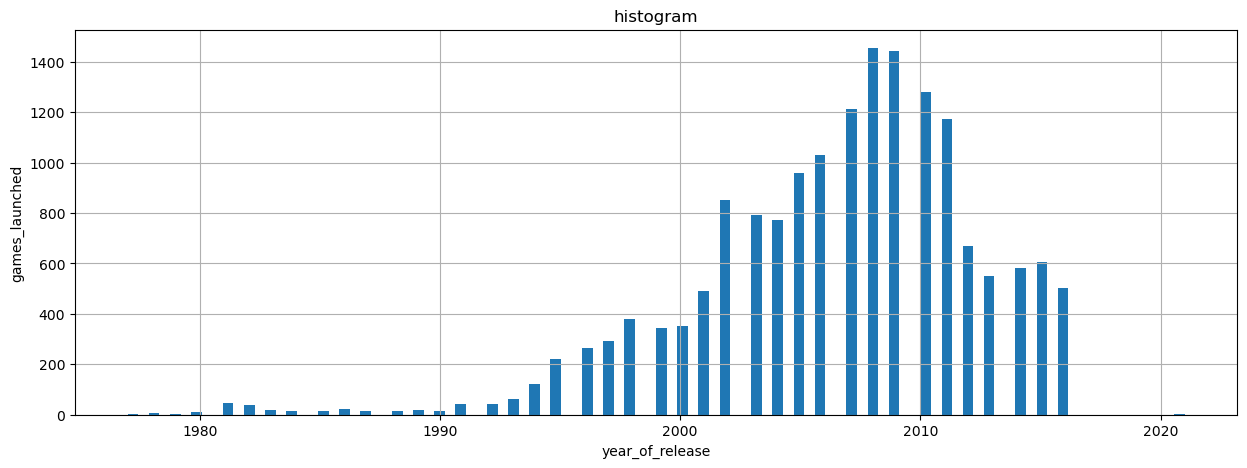

In [42]:
histogram(games, "year_of_release", "games_launched", "histogram")

Podemos apreciar que desde 1980 hasta 1992 los juegos lanzados cada año son mínimos, es a partir de 1994 que comienza a aumentar la cantidad de juegos lanzados por año llegando al peak máximo en 2008 para desde ahí disminuir hasta mantenerse en una cantidad constante entre 2012 y 2016. En base a lo anteriormente expuesto, el periodo más interesante para abordar es entre 2012 y 2016 al ser los años más cercanos a nuestra fecha objetivo de pronóstico del estudio.

### 7.2 Variación de ventas entre plataformas <a name="platform"></a>

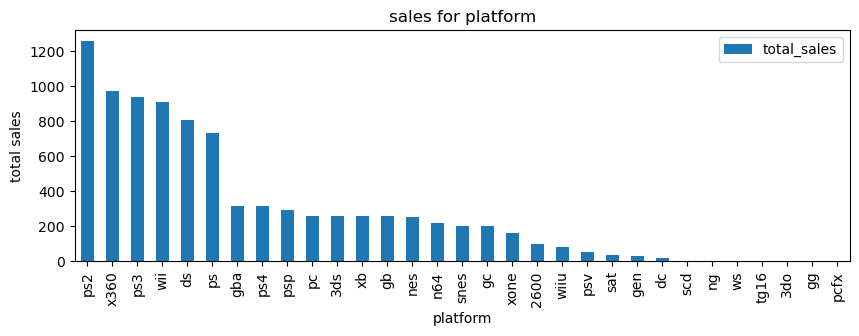

In [43]:
bar_graph_sorted(games, "platform", "total_sales", "sum", "total sales", "sales for platform")

Ahora procedemos a analizar la variación de ventas por plataformas, seleccionaremos las 3 plataformas con más ventas para construir distribuciones en base a los datos de cada año. También seleccionaremos otras plataformas de la familia "ps" para observar la vida útil de las mismas.

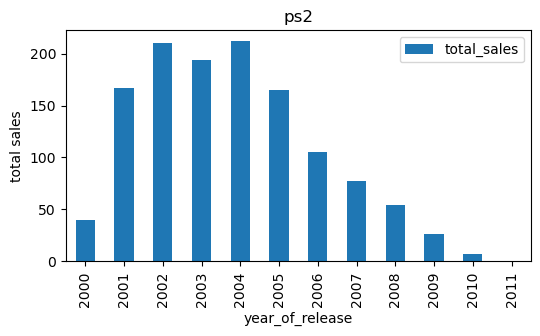

In [44]:
bar_graph(games[games["platform"]=="ps2"], "year_of_release", "total_sales", "total sales", "ps2")

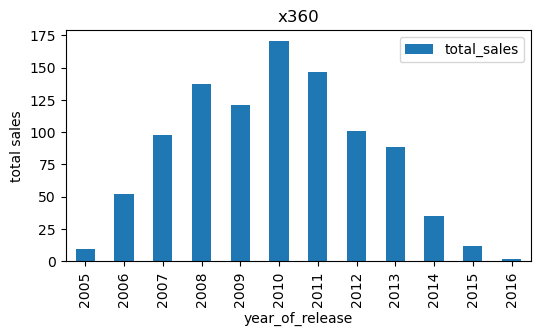

In [45]:
bar_graph(games[games["platform"]=="x360"], "year_of_release", "total_sales", "total sales", "x360")

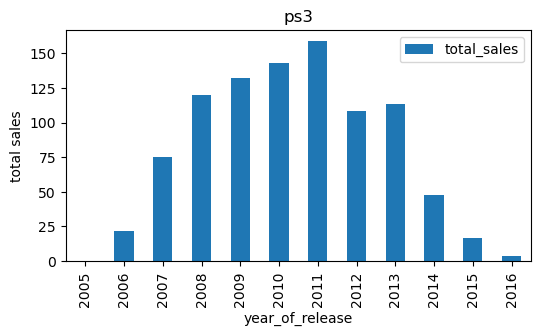

In [46]:
bar_graph(games[games["platform"]=="ps3"], "year_of_release", "total_sales", "total sales", "ps3")

Observando las 3 plataformas con más ventas podemos deducir que el ciclo de vida de estas es de alrededor de los 12 años y que el peak de ventas por plataforma se da en la mitad de su vida útil.

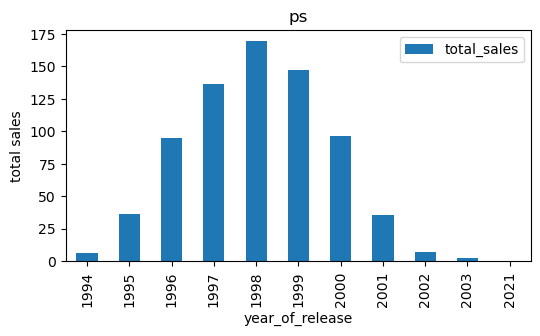

In [47]:
bar_graph(games[games["platform"]=="ps"], "year_of_release", "total_sales", "total sales", "ps")

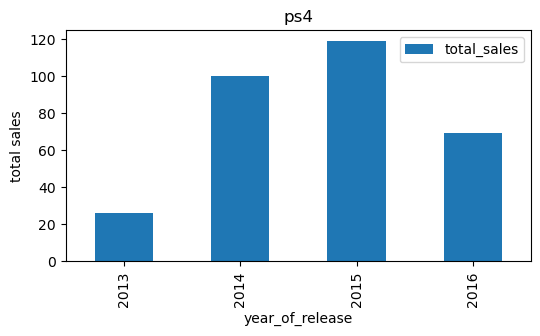

In [48]:
bar_graph(games[games["platform"]=="ps4"], "year_of_release", "total_sales", "total sales", "ps4")

En el caso de la plataforma "ps" podemos apreciar una vida útil de 11 años y que el peak de ventas es en la mitad de su vida útil como en la mayoria de las plataformas analizadas, para el caso de la "ps4", al ser de las últimas plataformas lanzadas durante este análisis solo lleva 4 años de vida y aun no podemos determinar su peak de ventas aun.

En esta parte podemos concluir que la vida útil promedio de las plataformas es 12 años y que en general el peak de ventas de videojuegos por plataforma se da en la mitad de la vida útil de esta, además la renovación de nuevas plataformas de una misma compañía, observando el caso de la serie "ps", se da unos 3 años antes de que termine la vida util de la plataforma anterior.

### 7.3 Periodo a abarcar <a name="period"></a>

Considerando que el objetivo del proyecto es predecir patrones que nos indiquen en que videojuegos sería conveniente invertir para el año 2017 es que se ha decidido abarcar los 5 años anteriores a esta fecha para analizar los datos, es decir desde 2012 a 2016.

### 7.4 Recorte base de datos <a name="cutout"></a>

En base al periodo a abarcar decidido en el punto anterior, restringiremos nuestra base de datos a ese periodo.

In [49]:
games_shorted = games[games["year_of_release"]>=2012]

### 7.5 Plataformas más rentables <a name="rentable"></a>

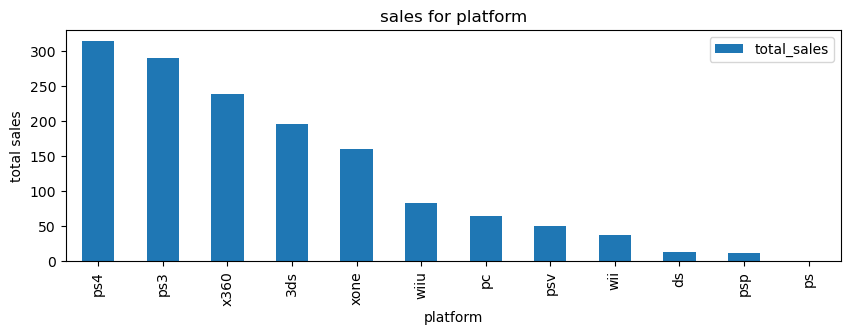

In [50]:
bar_graph_sorted(games_shorted, "platform", "total_sales", "sum","total sales", "sales for platform")

Con la base de datos recortada, consideraremos para nuestro siguiente análisis las plataformas con clara tendencia de liderazgo de ventas, en este caso serán "ps4", "ps3", "x360", "3ds" y "xone".

In [51]:
games_filter = games_shorted[games_shorted["platform"].isin(["ps4","x360","ps3","xone","3ds"])]

### 7.6 Ventas globales <a name="global"></a>

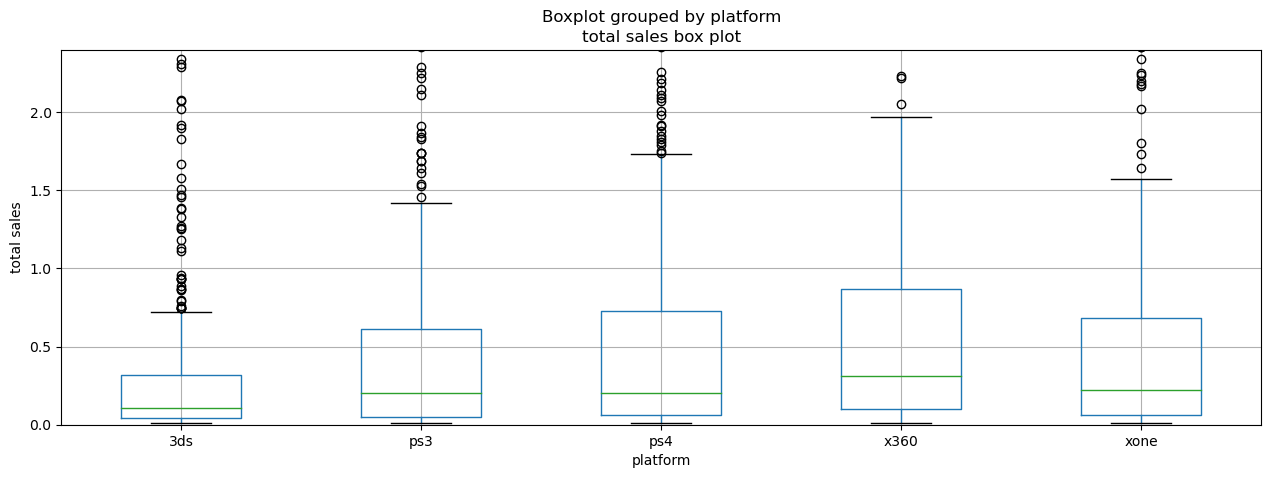

In [52]:
diagcaja(games_filter, "total_sales", "platform", 0, 2.4, "total sales")

In [53]:
games_filter.pivot_table(index="platform", values="total_sales", aggfunc="mean")

,total_sales
platform,
3ds,0.490050
ps3,0.585414
ps4,0.801378
x360,0.805390
xone,0.645020


Al observar el diagrama de caja de las ventas totales por plataformas podemos advertir que las medianas de ventas de casi todas las plataformas son similares, exceptuando por "3ds" que es un poco menor al resto y la "x360" que sobresale un poco, mientras que los promedios de ventas difieren de forma más significativa viéndose afectados por los percentiles 75 de cada plataforma y a su vez por los valores anómalos, siendo más altos en la x360 seguido de la ps34, cuando según lo visto anteriormente la "x360" queda en tercer puesto en juegos vendidos.

### 7.7 Correlación entre reseñas y ventas <a name="corr"></a>

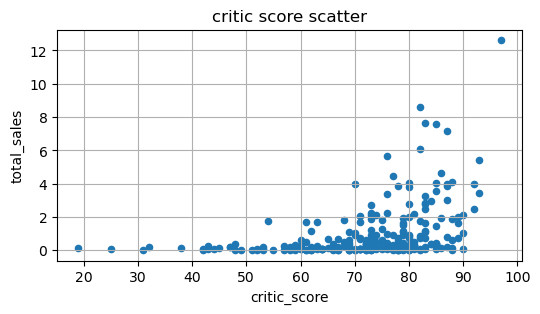

In [54]:
disp(games_filter[games_filter["platform"]=="ps4"], "critic_score", "total_sales", "critic score scatter")

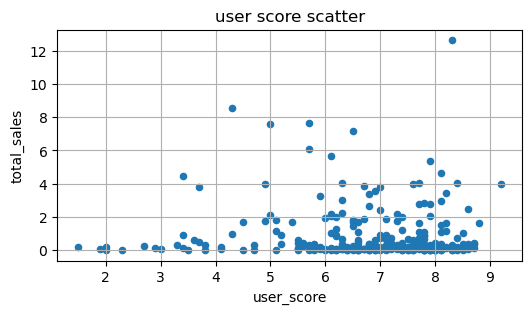

In [55]:
disp(games_filter[games_filter["platform"]=="ps4"], "user_score", "total_sales", "user score scatter")

In [56]:
games_filter[games_filter["platform"]=="ps4"][["critic_score", "user_score", "total_sales"]].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


Como podemos apreciar al observar los gráficos de dispersión y el diagrama de correlación al analizar las ventas totales de videojuegos versus las críticas de estos en "ps4", existe una relación directamente proporcional entre las reseñas y las ventas totales, comparando entre las reseñas profesionales y las de usuarios, como se puede suponer, las críticas de expertos poseen una mayor correlación con el total de ventas que las de usuarios..

### 7.8 Mismos juegos en diferentes plataformas <a name="same"></a>

Ahora procederemos a analizar cómo se comporta la venta de videojuegos que se publican en más de una plataforma, en este caso específico hemos elegido dos plataformas de las filtradas con más ventas y que pertenecen a una misma generación, es decir, comparten un periodo cronológico similar y capacidades técnicas también similares. Hemos escogido para este análisis "ps4" y "xone".

In [57]:
same_games_filter = games_shorted[games_shorted["platform"].isin(["ps4","xone"])]

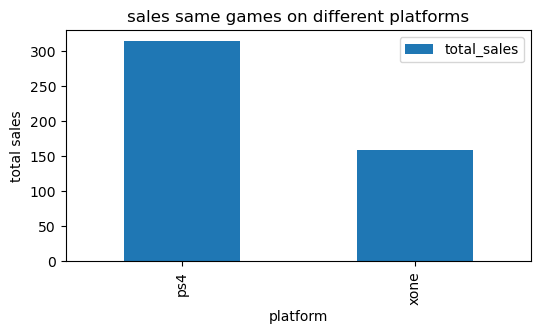

In [58]:
bar_graph(same_games_filter, "platform", "total_sales","total sales", "sales same games on different platforms")

Observando la comparación de venta de videojuegos que se publican en más de una plataforma podemos observar un gran favoritismo en la plataforma de sony versus la plataforma de microsoft, llegando a casi doblar las ventas de videojuegos en ps4 versus xbox one. Lo anterior nos demuestra que por lo menos en los años analizados existe una clara preferencia de una marca de plataforma versus su competidor más directo.

### 7.9 Distribución de ventas por géneros <a name="genre"></a>

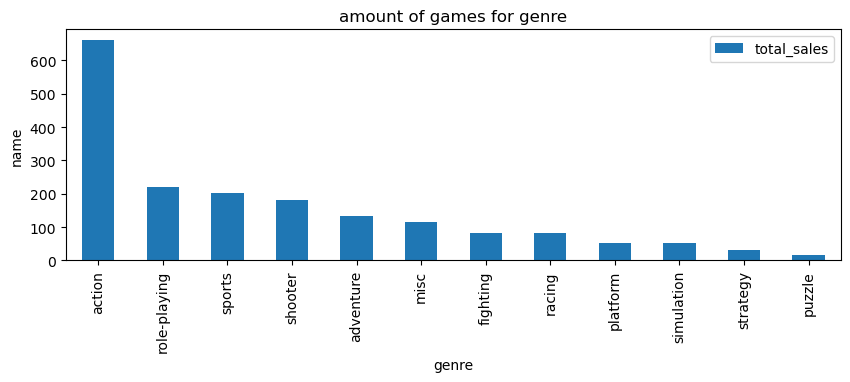

In [59]:
bar_graph_sorted(games_filter, "genre", "total_sales", "count", "name", "amount of games for genre")

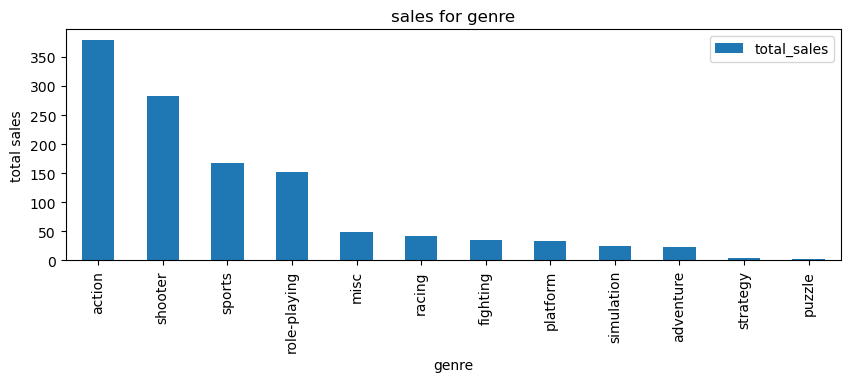

In [60]:
bar_graph_sorted(games_filter, "genre", "total_sales", "sum","total sales", "sales for genre")

Con respecto a la distribución de la cantidad de juegos lanzados versus la cantidad de ventas por género, podemos concluir que existe una relación entre ambos al ser el género de acción el que cuentan con más juegos lanzados y a su vez el que posee más ventas, mientras que estrategia y puzzle son los géneros con menos ventas y están en la cola de cantidad de juegos lanzados.

## 8. Perfil de usuario <a name="profile"></a>

Procederemos a crear un perfil de usuario para las tres regiones más importantes con respecto a la venta de videojuegos, Norteamérica, Europa y Japón.

### 8.1 Perfil usuario norteamericano <a name="profile_na"></a>

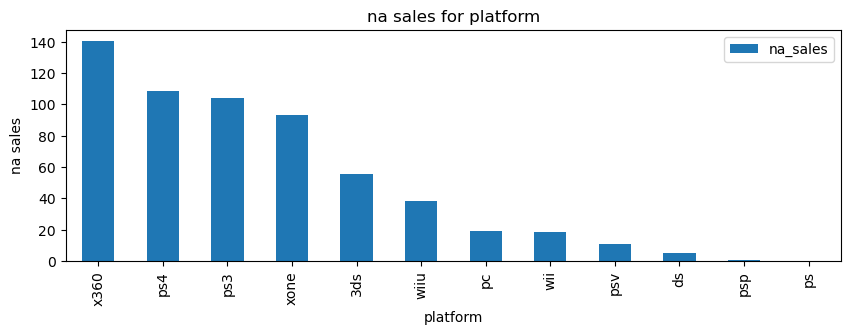

In [61]:
bar_graph_sorted(games_shorted, "platform", "na_sales", "sum", "na sales", "na sales for platform")

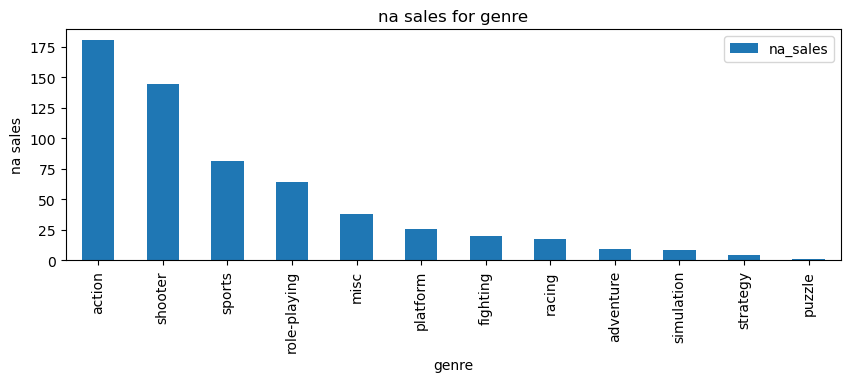

In [62]:
bar_graph_sorted(games_shorted, "genre", "na_sales", "sum", "na sales", "na sales for genre")

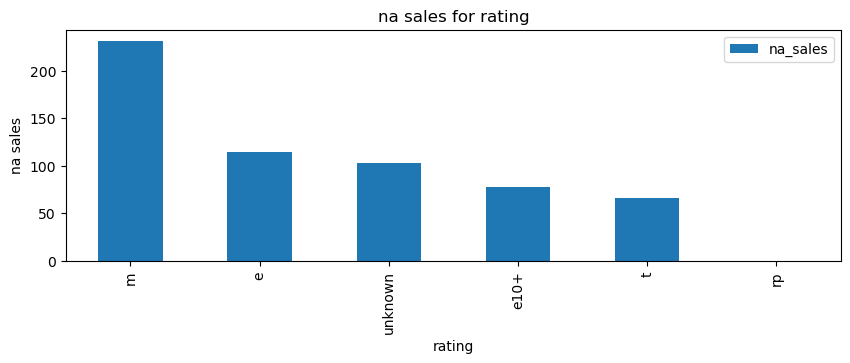

In [63]:
bar_graph_sorted(games_shorted, "rating", "na_sales", "sum", "na sales", "na sales for rating")

Comenzando por el usuario norteamericano, las 5 plataformas preferidas para este consumidor son en orden "x360", "ps4", "ps3", "xone" y "3ds". Con respecto a los géneros observamos que los preferidos son "action", "shooter", "sports", "role-playing" y "misc". En el caso de las clasificaciones pareciera existir una cierta relación con las ventas, ya que hay una clara preferencia hacia los juegos de clasificación mature versus el resto, para luego seguir progresivamente en orden de clasificación, "everyone", "everyone +10" y "teen".  

### 8.2 Perfil de usuario europeo <a name="profile_eu"></a>

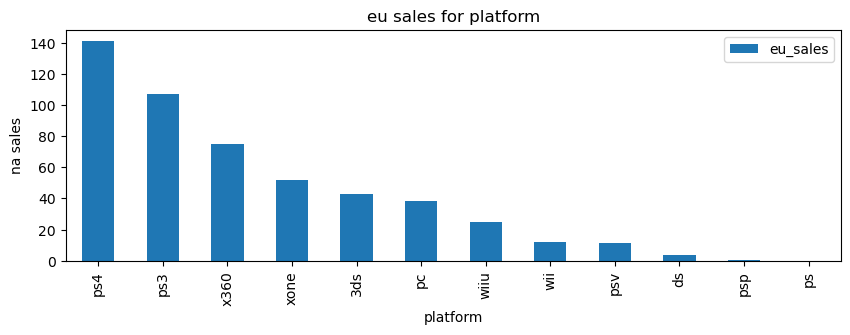

In [64]:
bar_graph_sorted(games_shorted, "platform", "eu_sales", "sum", "na sales", "eu sales for platform")

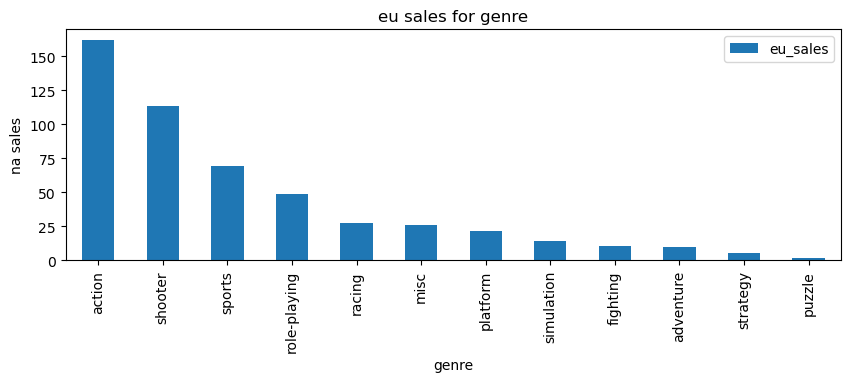

In [65]:
bar_graph_sorted(games_shorted, "genre", "eu_sales", "sum", "na sales", "eu sales for genre")

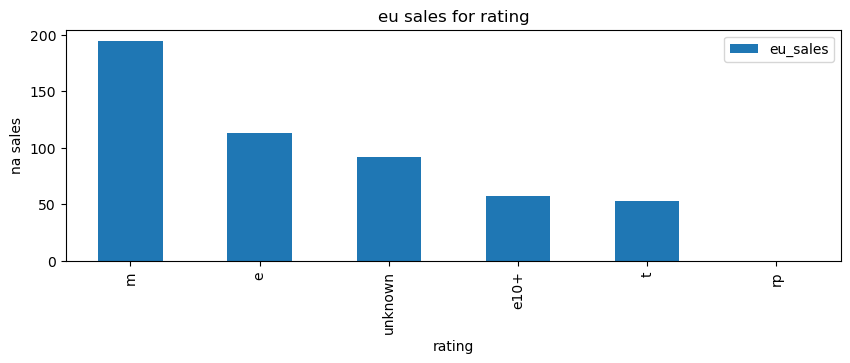

In [66]:
bar_graph_sorted(games_shorted, "rating", "eu_sales", "sum", "na sales", "eu sales for rating")

Para el usuario europeo, las 5 plataformas preferidas para este consumidor son en orden "ps4", "ps3", "x360", "xone" y "3ds". Con respecto a los géneros observamos que los preferidos son "action", "shooter", "sports", "role-playing" y "racing". En el caso de las clasificaciones pareciera existir la misma relación que en los usuarios norteamericanos, observándose una clara predilección por los juegos "mature" para luego seguir el orden de edad de clasificaciones.

### 8.3 Perfil de usuario japones <a name="profile_jp"></a>

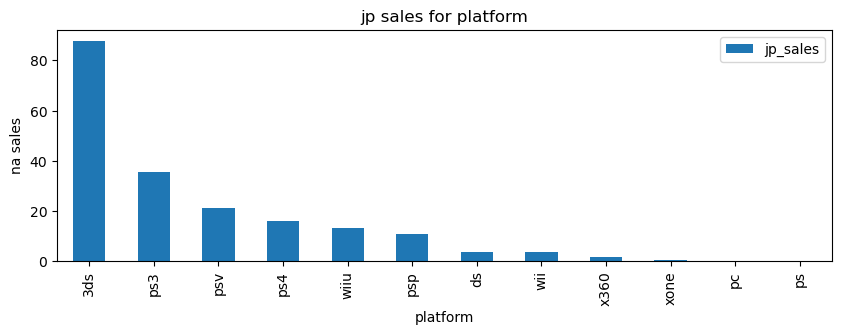

In [67]:
bar_graph_sorted(games_shorted, "platform", "jp_sales", "sum", "na sales", "jp sales for platform")

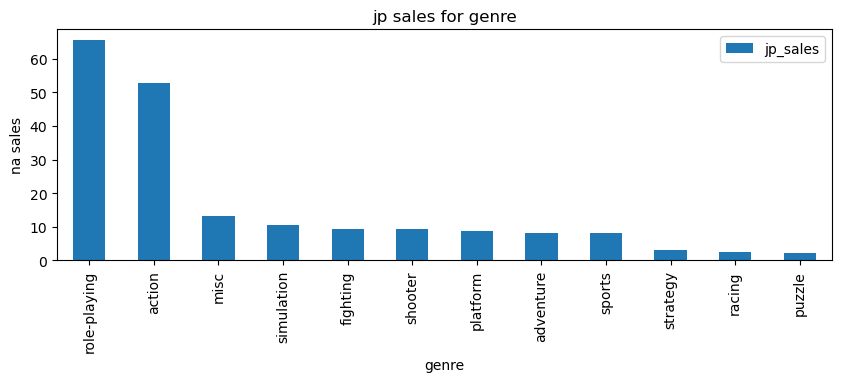

In [68]:
bar_graph_sorted(games_shorted, "genre", "jp_sales", "sum", "na sales", "jp sales for genre")

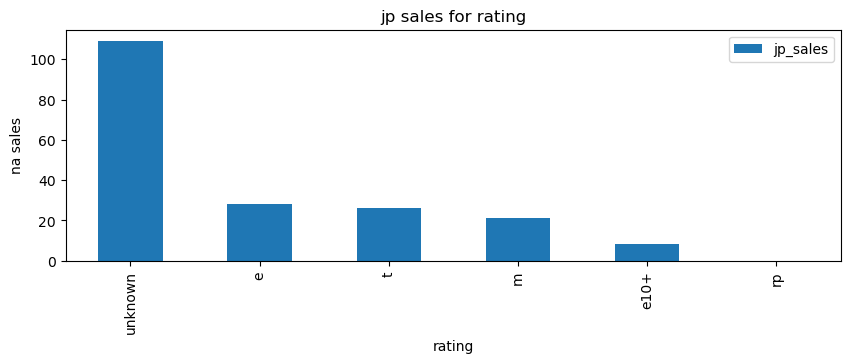

In [69]:
bar_graph_sorted(games_shorted, "rating", "jp_sales", "sum", "na sales", "jp sales for rating")

Para finalizar con el usuario japonés, las 5 plataformas preferidas para este consumidor son en orden "3ds", "ps3", "psv", "ps4" y "wiiu". Con respecto a los géneros observamos que los preferidos son "role-playing", "action", "misc", "simulation" y "fighting". En el caso de las clasificaciones no podemos concluir si existe una relación entre las ventas y las mismas ya que las clasificaciones desconocidas poseen un número de ventas mucho mayores que el resto.  

### 8.4 Conclusiones perfiles de usuarios <a name="conclusion1"></a>

Para finalizar con respecto a los perfiles de usuarios, podemos concluir a grandes rasgos que los usuarios occidentales, norteamericanos y europeos, poseen un perfil de usuario muy parecidos teniendo las 5 plataformas iguales entre su top 5 de plataformas favoritas y 4 géneros de videojuegos iguales en su top 5 de géneros de videojuegos, incluso en esta última categoría encontrándose prácticamente en el mismo orden. Con respecto al usuario japonés este varia sus consolas preferidas con respecto a los usuarios occidentales, teniendo en primer lugar con gran diferencia a las 3ds la cual se posiciona en quinto lugar para los usuarios occidentales, aunque con respecto a los géneros presenta semejanzas con los otros perfiles, su género preferido, "role-playing", saca mucha diferencia en venta al resto de los géneros mientras que en los otros perfiles este se encuentra en cuarto lugar de preferencias. Por lo anteriormente expuesto podemos considerar muy parecidos a los usuarios occidentales pero el usuario japonés difiere fuertemente en sus preferencias.

Para el caso de las clasificaciones parece existir una cierta influencia en la venta de videojuegos para el usuario occidental, siendo la mayor predilección por los juegos "mature", pero como con el resto de las categorías en el caso del usuario japonés esto es diferente y no puede ser comprobado.

## 9. Prueba de hipótesis <a name="hypothesis"></a>

Ahora procederemos a realizar las pruebas de hipótesis con respecto a igualdad de medias en dos poblaciones, primero comprobaremos la hipótesis de si las calificaciones promedio de usuarios en "xone" y "pc" son las mismas y posteriormente comprobaremos si las calificaciones promedio de usuarios para géneros de "action" y "sports" difieren. Para poder realizar las pruebas crearemos un dataframe sin los valores ausentes en la columna "user_score" ya que estos podrían interferir en la prueba de hipótesis.

In [70]:
user_not_null = games.drop(games[games.user_score.isnull()].index)

### 9.1 Calificaciones promedio usuarios Xbox One y PC <a name="xone_pc"></a> 

Comenzaremos realizando una prueba de Levene para poder verificar como definir el parámetro "equal_var" en la prueba de hipótesis de comparación de medias que realizaremos a continuación. La hipótesis nula será que las varianzas entre ambas clasificaciones promedio de usuarios no varía y ocuparemos un valor de alfa de un 5%. Procederemos a observar la distribución de las calificaciones promedios para decidir el valor del parámetro median.

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

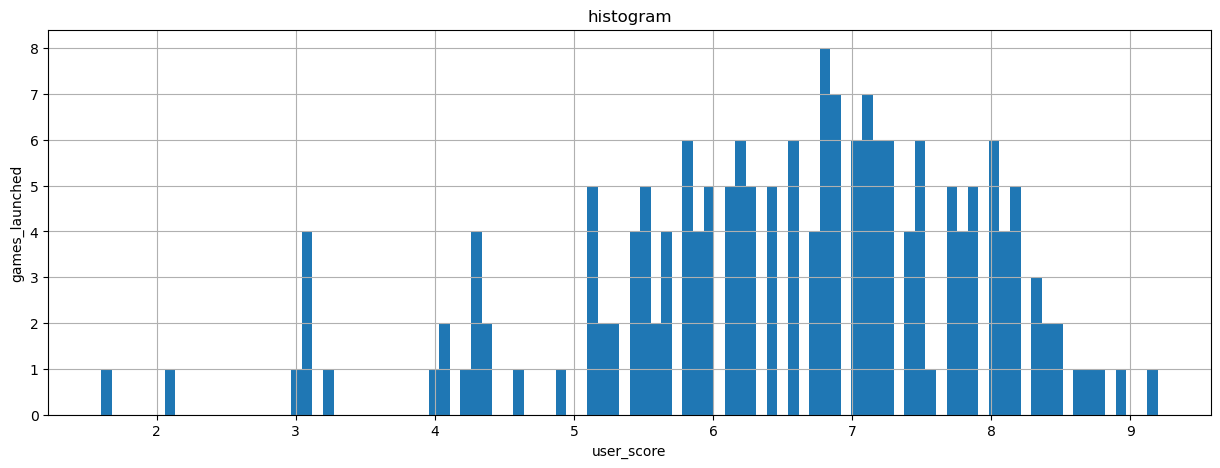

In [71]:
histogram(user_not_null[user_not_null["platform"]=="xone"], "user_score", "games_launched", "histogram")

count    770.000000
mean       7.062468
std        1.529963
min        1.400000
25%        6.200000
50%        7.500000
75%        8.200000
max        9.300000
Name: user_score, dtype: float64

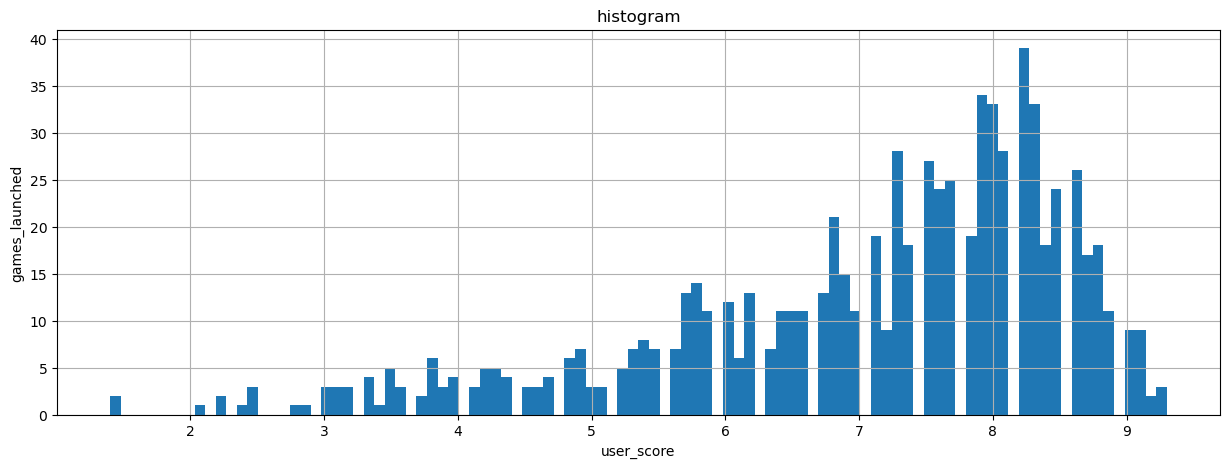

In [72]:
histogram(user_not_null[user_not_null["platform"]=="pc"], "user_score", "games_launched", "histogram")

Al observar el histograma de las clasificaciones promedio de usuarios de ambas plataformas, observamos que tienen distribuciones sesgadas por lo que en la prueba de Levene utilizaremos center = "median".

In [73]:
st.levene(user_not_null[user_not_null["platform"]=="xone"]["user_score"],user_not_null[user_not_null["platform"]=="pc"]["user_score"],center="median")

LeveneResult(statistic=1.2212506384014863, pvalue=0.2693951512047048)

Podemos apreciar que el pvalue es de un 27% por lo que al ser mayor que nuestro valor alfa no tenemos suficiente evidencia para rechazar la hipótesis de que las varianzas de ambas calificaciones promedio son iguales, por lo que las trataremos como iguales en la prueba de hipótesis de comparación de medias.

Ahora continuaremos comprobando la hipótesis de si las calificaciones promedio de usuarios en "xone" y "pc" son las mismas, para este caso definiremos la hipótesis nula como que las calificaciones son las mismas ya que normalmente se define la hipótesis nula como que no hay variaciones entre los valores estudiados. Para el caso del valor alfa utilizaremos el valor del 5% por ser una medida común de significación estadística.

In [74]:
alpha = 0.05

In [75]:
results = st.ttest_ind(user_not_null[user_not_null["platform"]=="xone"]["user_score"], user_not_null[user_not_null["platform"]=="pc"]["user_score"],equal_var=True)

In [76]:
print('p-value:', results.pvalue)

p-value: 1.3896435533548819e-05


In [77]:
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

Rechazamos la hipótesis nula


Realizada la prueba de hipótesis podemos comprobar que se rechazó la hipótesis nula, es decir calificaciones de usuarios entre las plataformas "xone" y "pc" si difiere. el p-value es de 1.389e-05 aprox, es decir que existe una probabilidad muy baja de obtener un valor de igualdad de calificaciones en ambas plataformas como hemos establecido en la hipótesis nula, al ser este valor tan bajo es poco probable de la diferencia entre calificaciones sea debido al azar y por esto es rechazada la hipótesis nula.

### 9.2 Calificaciones promedio usuarios Acción y Deportes <a name="action_sports"></a>

Igualmente que en el caso anterior, comenzaremos con una prueba de Levene para poder verificar como definir el parámetro "equal_var". La hipótesis nula será que las varianzas entre ambas clasificaciones promedio de usuarios no varía y ocuparemos un valor de alfa de un 5%. A continuación, veremos las distribuciones para decidir el valor del parámetro center.

count    1830.000000
mean        7.054044
std         1.425394
min         0.300000
25%         6.300000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

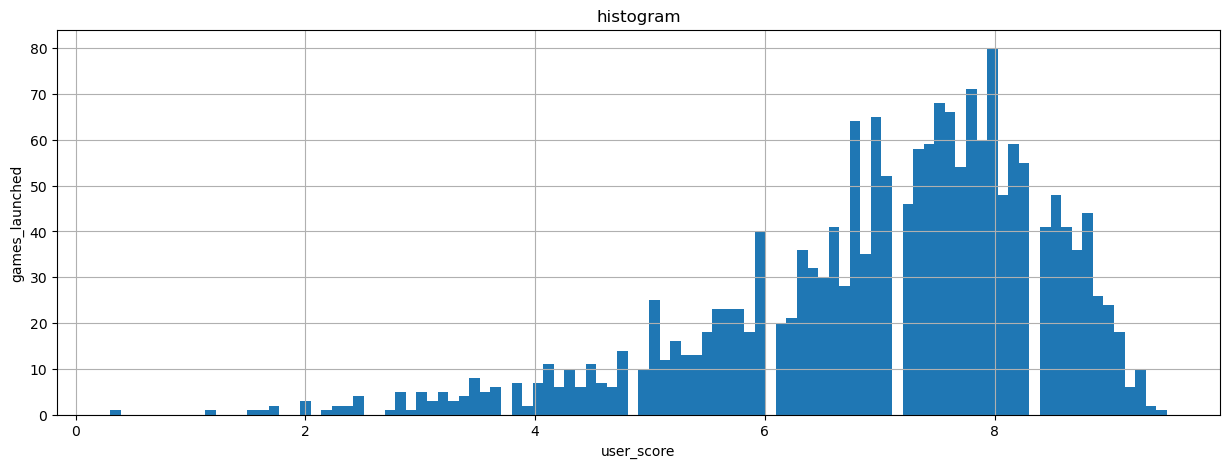

In [78]:
histogram(user_not_null[user_not_null["genre"]=="action"], "user_score", "games_launched", "histogram")

count    1103.000000
mean        6.961197
std         1.611370
min         0.200000
25%         6.100000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

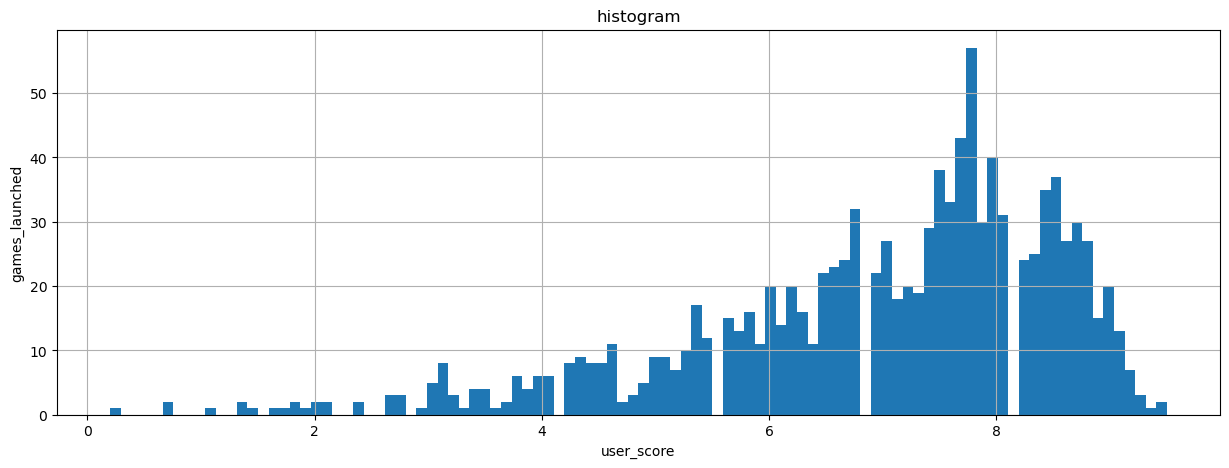

In [79]:
histogram(user_not_null[user_not_null["genre"]=="sports"], "user_score", "games_launched", "histogram")

Igual que en el caso anterior, ambas distribuciones son sesgadas por lo que utilizaremos el valor "median" para el parámetro center.

In [80]:
st.levene(user_not_null[user_not_null["genre"]=="action"]["user_score"], user_not_null[user_not_null["genre"]=="sports"]["user_score"],center="median")

LeveneResult(statistic=14.132896085177192, pvalue=0.0001736640672727649)

Podemos apreciar que el pvalue es de un 0.002% por lo que al ser menor que nuestro valor alfa podemos concluir que la probabilidad de obtener varianzas iguales en entre ambos promedios es muy baja y esto no es debido al azar por lo que se rechaza la hipótesis nula y por ende procederemos a tratar las varianzas como distintas en la prueba de hipótesis de comparación de medias.

Continuamos comprobando la hipótesis de que las calificaciones promedio de los usuarios en los géneros de acción y deportes difieren, para este caso definiremos la hipótesis nula como las clasificaciones en ambos géneros no difiere bajo el mismo argumento que en el caso anterior, para el valor alfa también se utilizara el 5% por ser una medida común de significación estadística.

In [81]:
alpha = 0.05

In [82]:
results = st.ttest_ind(user_not_null[user_not_null["genre"]=="action"]["user_score"], user_not_null[user_not_null["genre"]=="sports"]["user_score"],equal_var=False)

In [83]:
print('p-value:', results.pvalue)

p-value: 0.11483818791498286


In [84]:
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

No rechazamos la hipótesis nula


Realizada la prueba de hipótesis podemos comprobar que no se rechazó la hipótesis nula, es decir nuestro análisis sugiere que el promedio de calificaciones de usuarios entre los dos géneros abordados es similar por ende nuestra hipótesis original de que estos promedios diferían no puede ser validada. En este caso el p-value es de un 11% aprox, por lo que las diferencias en los promedios de las calificaciones pueden verse influenciados por el azar de donde se obtuvieron los datos.

## 10. Conclusión general <a name="end"></a>

Comenzamos el presente proyecto con el pre procesamiento de los datos, se estandarizaron los datos categóricos pasándolos a minúsculas para facilitar el trabajo con los mismos y se transformaron tipos de datos incorrectos por otros más apropiados, como transformar el año de publicación de los videojuegos de un número decimal a un número entero. 

Posteriormente continuamos tratando los valores ausentes presentes en el dataframe, para el caso de las columnas “name” y “genre” existían dos filas compartidas que presentaban ausencia de datos en estas columnas, se decidió eliminar estas filas ya que la no existencia del identificador único de las filas, en este caso la columna “name”, pone en duda la validez de los datos en el resto de las columnas. Para el caso de la columna “year_of_release” se decidió rellenar con los valores de videojuegos que se repetían en múltiples plataformas, posterior a esto se buscó el nombre de videojuegos de deportes, ya que estos normalmente tienen el número del año en su nombre, para completar más datos, finalmente se creó un dataframe con información externa para terminar de completar los datos. Para los casos de las columnas “critic_score” y “user_score” se decidió no completar los valores por no tener una relación directa con ninguna columna y ser parte del análisis del proyecto. Para finalizar la columna “rating” fue completada con valores de “unknown” ya que es una característica propia del videojuego que no puede ser iterada a partir de otras columnas.

Continuamos con un enriquecimiento de los datos creando una nueva columna con las ventas totales de todas las regiones para cada videojuego con el fin de utilizarla en el análisis próximo a realizar.

Procedimos con el análisis general de los datos, en esta sección se abordaron distintos puntos de los cuales se pueden extraer diversas conclusiones que se utilizaran para dar el veredicto final del informe. 

Comenzamos observando la cantidad de videojuegos lanzados por años, de aquí podemos concluir que a partir del año 1994 comienza un auge en la venta de videojuegos para llegar a su peak en el año 2008 y después disminuir a unos valores más o menos constantes desde el año 2012. Continuamos observando las plataformas con más ventas de videojuegos y viendo cómo se distribuyen las ventas a través de los años, de aquí pudimos concluir que un ciclo de vida aproximado de las plataformas es de alrededor de 12 años y que las nuevas generaciones aparecen unos 3 años antes del término de la vida útil de la generación anterior.

En base a los datos obtenidos en los puntos anteriores se decidió delimitar la base de datos a los videojuegos lanzados desde el 2012, ya que es de importancia analizar los años más cercanos a la fecha sobre la que se quieren realizar predicciones en el análisis, por otra parte, se decidió trabajar con las plataformas con más ventas en estos años, "ps4", "x360", "ps3", "xone" y "3ds".

Al analizar las ventas globales en cada una de las plataformas seleccionadas pudimos notar que las medias de ventas eran similares en la mayoría de ellas, pero que sus promedios de ventas diferían de formas más significativas debido a valores anómalos.

Posteriormente tenemos un análisis de la relación entre las ventas totales de un videojuego con respecto a otras columnas, al comparar las reseñas versus las ventas podemos encontrar una correlación directa entre ambos tipos de columnas pero que no presenta una relación demasiado fuerte, es decir existe esta correlación, pero no es tan determinante o al menos no es completamente definitoria. Para el caso de las reseñas profesionales versus las reseñas de usuarios, en el caso estudiado de la plataforma “ps4” que es la que presenta más ventas totales de videojuegos de todas las plataformas en la época abarcada, se encontró una mayor correlación en las reseñas de profesionales que en la de usuarios lo que sigue una logica de prensa especializada. Con respecto a los géneros de los videojuegos se pudo identificar una relación concordante entre los géneros con más juegos publicados y más unidades vendidas lo cual podría tener dos interpretaciones, o estos géneros realmente conllevan una mayor venta de videojuegos y debido a esto se producen más videojuegos de los mismos géneros o en cambio al producirse más videojuegos de estos géneros conlleva a que se vendan más videojuegos de los mismos.

Finalmente se observó cómo se distribuyen las ventas de videojuegos lanzados en diferentes plataformas observándose que existe una diferencia significativa en los mismos, declarando una clara preferencia por la consola de sony, "ps4".

Pasamos a crear perfiles de usuarios para las regiones más importantes abordadas en el proyecto, aquí pudimos llegar a la conclusión que los usuarios occidentales, norteamericanos y europeos, presentan patrones de consumos similares, adquiriendo prácticamente las mismas plataformas y los mismos géneros de videojuegos mientras que el usuario oriental, japonés en este caso, presente un patrón de consumo distinto para ambas categorías. Con respecto a la influencia de las clasificaciones de los videojuegos parece existir una mayor influencia de esta en los usuarios occidentales mientras que para el usuario japonés esta parece no influir.

Se realizaron dos pruebas de hipótesis, para cada una se realizó una prueba de Levene para decidir el valor del parámetro equal_var, la primera con respecto a que las calificaciones promedio de usuarios en las plataformas de “xone” y “pc” no diferían. Para este primer caso se utilizó como hipótesis nula que ambos promedios de calificaciones no difieren y como valor alpha se escogió un 5% por ser un valor habitual del mismo. Como resultado la hipótesis se procedió a rechazar la hipótesis nula ya que el p-value obtenido era mucho menor que el valor alpha escogido por lo que las diferencias entre ambos promedios de calificaciones no se deben al azar de la recolección de los datos sino a que ambas difieren en sí mismas.

Como segunda prueba de hipótesis se verifico si las calificaciones promedio de usuarios para los géneros de “action” y “sports” difieren, en este caso se utilizó como hipótesis nula que las calificaciones no difieren y un valor alpha de 5% por lo expuesto en la prueba anterior. En este caso se obtuvo un p-value de un 10% aproximadamente por lo que no se puede rechazar la hipótesis nula de que las calificaciones entre estos dos géneros no difieren y por ende rechazamos nuestra hipótesis original que planteaba que diferían.

Para concluir, con respecto a la pregunta inicial planteada sobre identificar patrones que determinen si un juego es exitoso o no podemos inferir lo siguiente:

El primer punto a considerar es que tipo de usuario es el que se quiere abordar para las ventas del videojuego, en el caso estudiado por este informe se recomienda abordar los usuarios occidentales por ser una mayor parte del mercado y tener preferencias de consumo similares con lo que se abarcaría un mayor rango con especificaciones más delimitadas. Con respecto a las plataformas observadas en el dataset, se recomendaría sobre todo considerar los videojuegos que se lancen para “ps4” ya que la plataforma se encuentra con la mayor cantidad de videojuegos vendidos en los últimos 5 años y se encuentra en menos de la mitad de su vida útil y es de suma importancia para la empresa que apueste por plataformas que están comenzando un nuevo ciclo de vida para prolongar por más tiempo la venta de videojuegos. Con respecto al género de los videojuegos, aunque no se logró comprobar si la mayor cantidad de ventas es por el género en sí mismo o porque existen más unidades de videojuegos de los propios géneros, no está de más enfocarse en los que cumplen estas características y a su vez están entre los preferidos de los usuarios occidentales, es decir “action”. Con respecto a las calificaciones de los videojuegos, es un punto a considerar, pero según los datos obtenidos no de principal importancia, en caso de querer considerarlo se debe enfocar en los videojuegos en que las clasificaciones de usuarios sean más altas. Como último punto a abordar, el “rating”, como el caso preferente es abordar al usuario occidental, debe considerarse como preferente los videojuegos con clasificación “M”, es decir “mature”.